https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


1. Атрибуты, связанные с посещением страниц:
    * "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related", "Product Related Duration":
        - Эти атрибуты представляют количество посещенных страниц разных типов и общее время, проведенное на каждой из этих категорий страниц.
        - Значения этих атрибутов рассчитываются на основе URL-адресов страниц, посещенных пользователем, и обновляются в реальном времени при действиях пользователя (например, переходе с одной страницы на другую).

2. Метрики, измеряемые с помощью "Google Analytics":
    * "Bounce Rate":
        - Процент посетителей, которые покидают сайт после просмотра одной страницы, не совершая других действий.
    * "Exit Rate":
        - Процент сеансов, в которых конкретная страница была последней.
    * "Page Value":
        - Средняя ценность страницы, которую посетил пользователь перед завершением транзакции.

3. Атрибуты, связанные с особыми днями:
    * "Special Day":
        - Указывает на близость даты посещения сайта к особому дню (например, День матери, День святого Валентина), когда вероятность завершения транзакции выше.
        - Значение атрибута определяется динамикой электронной коммерции, например, временем между датой заказа и доставки.
        - Например, для Дня святого Валентина значение будет ненулевым между 2 и 12 февраля, максимальное значение (1) — 8 февраля, а в остальные дни — 0, если они не близки к другому особому дню.

4. Дополнительные атрибуты:
    * Операционная система, браузер, регион, тип трафика, тип посетителя (новый или возвращающийся), флаг выходного дня (указывает, был ли визит в выходные), месяц года.

In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

In [2]:
!ls

Untitled.ipynb	online_shoppers_intention.csv


In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

# 1. Огляд даних

In [4]:
df.shape

(12330, 18)

In [5]:
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df['Weekend'] = df['Weekend'] * 1
df['Revenue'] = df['Revenue'] * 1

In [8]:
df.duplicated().sum()

125

In [9]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [11]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


# 2. Предобробка даних

In [12]:
df.columns = [i.lower() for i in df.columns]

In [13]:
df.head().T

,0,1,2,3,4
administrative,0,0,0,0,0
administrative_duration,0.0,0.0,0.0,0.0,0.0
informational,0,0,0,0,0
informational_duration,0.0,0.0,0.0,0.0,0.0
productrelated,1,2,1,2,10
productrelated_duration,0.0,64.0,0.0,2.666667,627.5
bouncerates,0.2,0.0,0.2,0.05,0.02
exitrates,0.2,0.1,0.2,0.14,0.05
pagevalues,0.0,0.0,0.0,0.0,0.0
specialday,0.0,0.0,0.0,0.0,0.0


In [14]:
df[df.duplicated()].T

,158,159,178,418,456,483,512,540,554,589,...,11733,11747,11801,11813,11827,11934,11938,12159,12180,12185
administrative,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
administrative_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
informational,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
informational_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
productrelated,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
productrelated_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bouncerates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
exitrates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
pagevalues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
specialday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df[df.eq(df.iloc[158]).all(axis=1)]

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,0,0
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,0,0


In [16]:
df[df.eq(df.iloc[159]).all(axis=1)]

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0


In [17]:
data = []
for i in df[df.duplicated(keep=False)].index:
    d = df[df.eq(df.iloc[i]).all(axis=1)]
    shape = d.shape[0]
    adm = d['administrative'].mean()
    inf = d['informational'].mean()
    pro = d['productrelated'].mean()
    data.append({'i': i, 'shape': shape, 'adm': adm, 'inf': inf, 'pro': pro})

dup = pd.DataFrame(data).sort_values(by='shape', ascending=False)
dup

,i,shape,adm,inf,pro
22,589,14,0.0,0.0,1.0
21,554,14,0.0,0.0,1.0
57,1453,14,0.0,0.0,1.0
55,1394,14,0.0,0.0,1.0
19,512,14,0.0,0.0,1.0
...,...,...,...,...,...
93,3231,2,0.0,0.0,1.0
94,3269,2,0.0,0.0,1.0
97,3367,2,0.0,0.0,1.0
98,3577,2,0.0,0.0,1.0


In [18]:
dup[['adm', 'inf', 'pro']].mean()

adm    0.000000
inf    0.000000
pro    1.059701
dtype: float64

In [19]:
dup[dup['pro'] > 1]

,i,shape,adm,inf,pro
51,1356,3,0.0,0.0,2.0
5,252,3,0.0,0.0,2.0
116,4552,3,0.0,0.0,2.0
126,5199,3,0.0,0.0,2.0
36,1023,3,0.0,0.0,2.0
81,2423,3,0.0,0.0,2.0
17,468,2,0.0,0.0,2.0
48,1291,2,0.0,0.0,2.0
162,9715,2,0.0,0.0,2.0
40,1123,2,0.0,0.0,2.0


In [20]:
df[df.eq(df.iloc[589]).all(axis=1)].head(20).T

,286,512,554,589,947,974,1034,1119,1390,1394,1453,1573,1933,1949
administrative,0,0,0,0,0,0,0,0,0,0,0,0,0,0
administrative_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
informational,0,0,0,0,0,0,0,0,0,0,0,0,0,0
informational_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
productrelated,1,1,1,1,1,1,1,1,1,1,1,1,1,1
productrelated_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bouncerates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
exitrates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
pagevalues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
specialday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df[df.eq(df.iloc[1356]).all(axis=1)].head(20).T

,252,1023,1356
administrative,0,0,0
administrative_duration,0.0,0.0,0.0
informational,0,0,0
informational_duration,0.0,0.0,0.0
productrelated,2,2,2
productrelated_duration,0.0,0.0,0.0
bouncerates,0.2,0.2,0.2
exitrates,0.2,0.2,0.2
pagevalues,0.0,0.0,0.0
specialday,0.0,0.0,0.0


In [22]:
def label_enc(df, column):
    unq = df[column].unique()
    new_value = {v: i for i, v in enumerate(unq)}
    print(column, new_value)
    df[column] = df[column].replace(new_value)

In [23]:
label_enc(df, 'month')
label_enc(df, 'visitortype')

month {'Feb': 0, 'Mar': 1, 'May': 2, 'Oct': 3, 'June': 4, 'Jul': 5, 'Aug': 6, 'Nov': 7, 'Sep': 8, 'Dec': 9}
visitortype {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}


У даних виявлено 201 дублікат, при цьому максимальна кількість повторень становить 14. Аналіз дублікатів показав, що в більшості випадків користувачі відвідували лише одну сторінку, використовуючи той самий браузер, операційну систему, регіон та джерело переходу. Я вважаю такі збіги незначними й не видаляю їх.

# 3. Кластерний аналіз

In [26]:
def cluster_plot(df, labels):
    for method in [TSNE(2), PCA(2)]:
        X = method.fit_transform(df)
        X = pd.DataFrame(data=X, columns=['x', 'y'])
        sns.scatterplot(data=X, x='x', y='y', hue=labels)
        
        plt.title(method)
        plt.show();

In [31]:
X = df.iloc[:, :-1]
scaler = MinMaxScaler().fit_transform(X)

In [34]:
df_copy = pd.DataFrame(columns=df.columns[:-1], data=scaler)
df_copy

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.000000,0.142857,0.083333,0.000,0.052632,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.428571,0.000000,1.000,0.105263,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0.000000,0.285714,0.083333,0.125,0.157895,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0.000000,0.285714,0.166667,0.000,0.157895,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,1.000000,0.428571,0.416667,0.000,0.000000,0.0,1.0
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,0.777778,0.285714,0.083333,0.000,0.368421,0.0,1.0
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,0.777778,0.285714,0.083333,0.000,0.631579,0.0,1.0
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,0.777778,0.142857,0.083333,0.250,0.526316,0.0,0.0


In [36]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
administrative,12330.0,0.085747,0.123029,0.0,0.000000,0.037037,0.148148,1.0
administrative_duration,12330.0,0.023779,0.052013,0.0,0.000000,0.002207,0.027438,1.0
informational,12330.0,0.020982,0.052923,0.0,0.000000,0.000000,0.000000,1.0
informational_duration,12330.0,0.013522,0.055209,0.0,0.000000,0.000000,0.000000,1.0
productrelated,12330.0,0.045009,0.063086,0.0,0.009929,0.025532,0.053901,1.0
productrelated_duration,12330.0,0.018676,0.029913,0.0,0.002878,0.009362,0.022887,1.0
bouncerates,12330.0,0.110957,0.242442,0.0,0.000000,0.015562,0.084063,1.0
exitrates,12330.0,0.215364,0.242983,0.0,0.071429,0.125782,0.250000,1.0
pagevalues,12330.0,0.016279,0.051328,0.0,0.000000,0.000000,0.000000,1.0
specialday,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.0


## K-means

In [38]:
score = {}
index, sse = 0, 0
range_l = list(range(2, 10))
for i in range_l:
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df_copy)
    score[i] = kmeans.inertia_

    sc = silhouette_score(df_copy, labels)
    if sc > sse:
        index = i
        sse = sc
        
print(f'index {index}, silhouette_score {sse}')

index 2, silhouette_score 0.33231684622581015


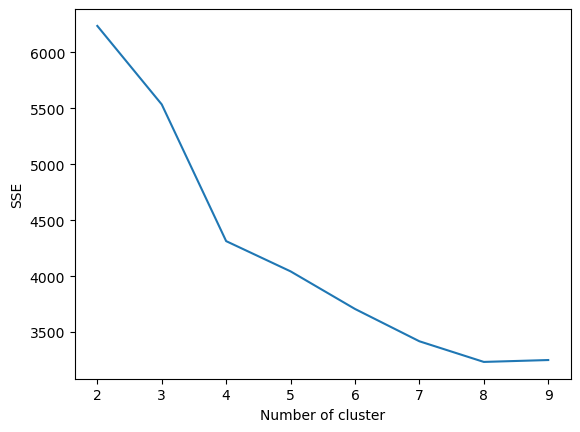

In [39]:
plt.plot(list(score.keys()), list(score.values()))

plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show();

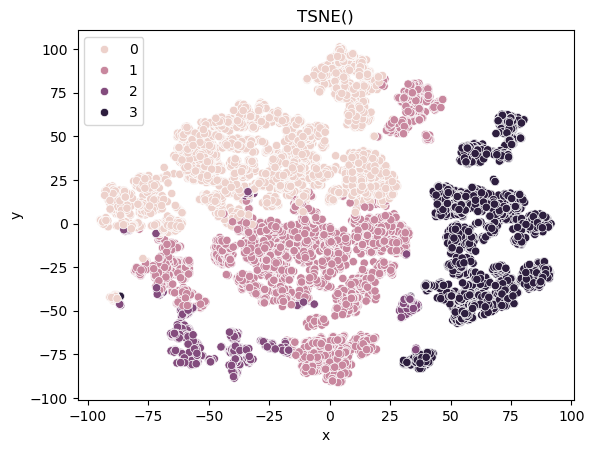

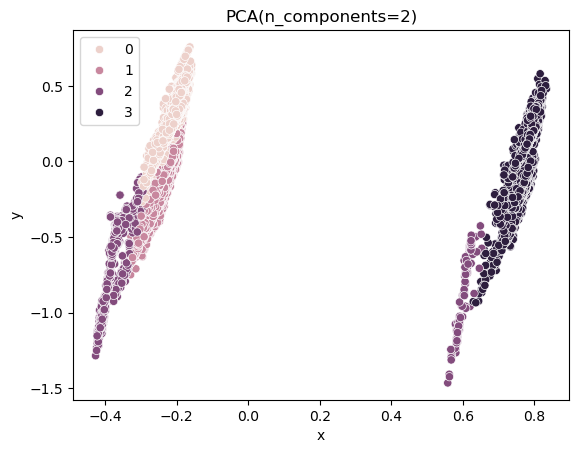

In [42]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df_copy)

cluster_plot(df_copy, kmeans_labels)

## DBSCAN

In [47]:
for i in np.linspace(0.1, 0.7, 7):
    for s in [5, 7, 10]:
        dbscan = DBSCAN(eps=i, min_samples=s)
        labels = dbscan.fit_predict(df_copy)

        if -1 in labels or len(set(labels)) == 1:
            print(f'eps {i}, min_samples {s}, continue')
            continue
        print(f'eps {i}, min_samples {s}, кількість кластерів {len(set(labels))}, silhouette_score {silhouette_score(df_copy, labels)}')

eps 0.1, min_samples 5, continue
eps 0.1, min_samples 7, continue
eps 0.1, min_samples 10, continue
eps 0.2, min_samples 5, continue
eps 0.2, min_samples 7, continue
eps 0.2, min_samples 10, continue
eps 0.3, min_samples 5, continue
eps 0.3, min_samples 7, continue
eps 0.3, min_samples 10, continue
eps 0.4, min_samples 5, continue
eps 0.4, min_samples 7, continue
eps 0.4, min_samples 10, continue
eps 0.5, min_samples 5, continue
eps 0.5, min_samples 7, continue
eps 0.5, min_samples 10, continue
eps 0.6, min_samples 5, continue
eps 0.6, min_samples 7, continue
eps 0.6, min_samples 10, continue
eps 0.7, min_samples 5, continue
eps 0.7, min_samples 7, continue
eps 0.7, min_samples 10, continue


In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_mm)

cluster_plot(df_mm, dbscan_labels)

## GaussianMixture

In [48]:
for i in range(1, 8):
    gaus = GaussianMixture(n_components=i)
    labels = gaus.fit_predict(df_copy)
    
    if -1 in labels or len(set(labels)) == 1:
        print(f'n_components {i}, continue, {set(labels)}')
        continue
    print(f'n_components {i}, кількість кластерів {len(set(labels))}, silhouette_score {silhouette_score(df_copy, labels)}')

n_components 1, continue, {0}
n_components 2, кількість кластерів 2, silhouette_score 0.1179703520107732
n_components 3, кількість кластерів 3, silhouette_score 0.09901974548659348
n_components 4, кількість кластерів 4, silhouette_score 0.022088822691929685
n_components 5, кількість кластерів 5, silhouette_score 0.0026101816521528457
n_components 6, кількість кластерів 6, silhouette_score 0.0365635106357476
n_components 7, кількість кластерів 7, silhouette_score -0.01716649814462458


## AgglomerativeClustering

In [51]:
# score = {}
index, sse = 0, 0
range_l = list(range(2, 10))
for i in range_l:
    aggc = AgglomerativeClustering(n_clusters=i)
    labels = aggc.fit_predict(df_copy)
    # score[i] = aggc.inertia_

    sc = silhouette_score(df_copy, labels)
    if sc > sse:
        index = i
        sse = sc
        
print(f'index {index}, silhouette_score {sse}')

index 3, silhouette_score 0.3508589573412384


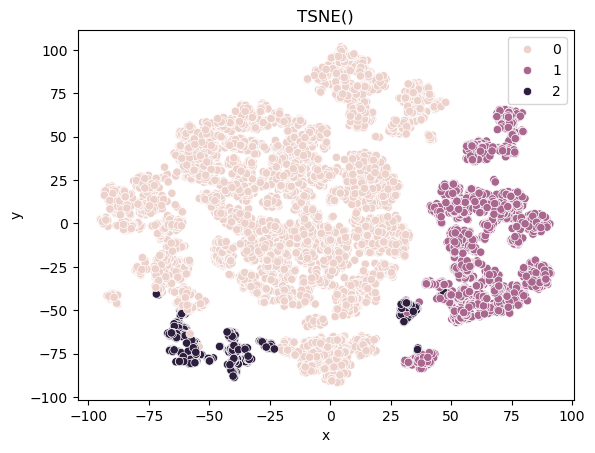

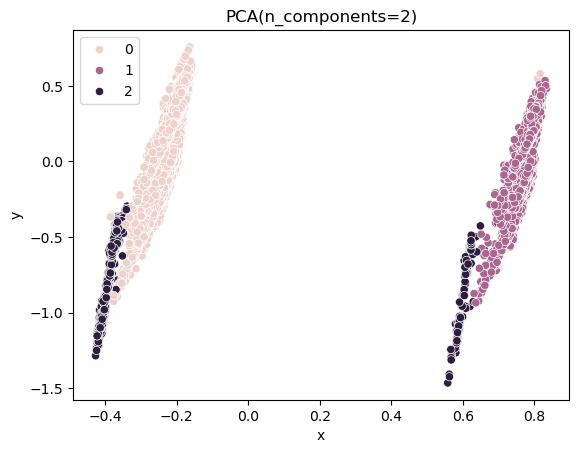

In [52]:
aggc = AgglomerativeClustering(n_clusters=3)
aggc_labels = aggc.fit_predict(df_copy)

cluster_plot(df_copy, aggc_labels)

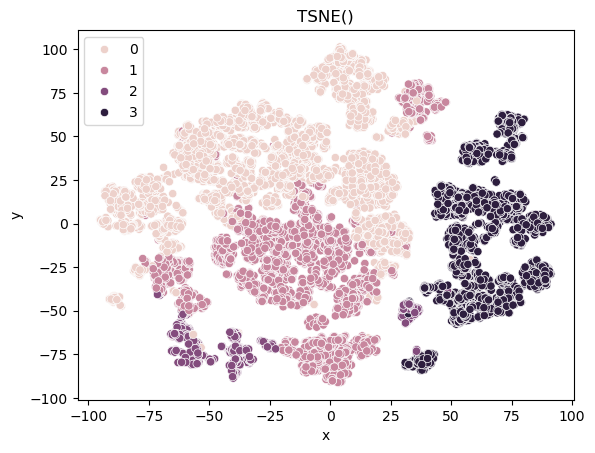

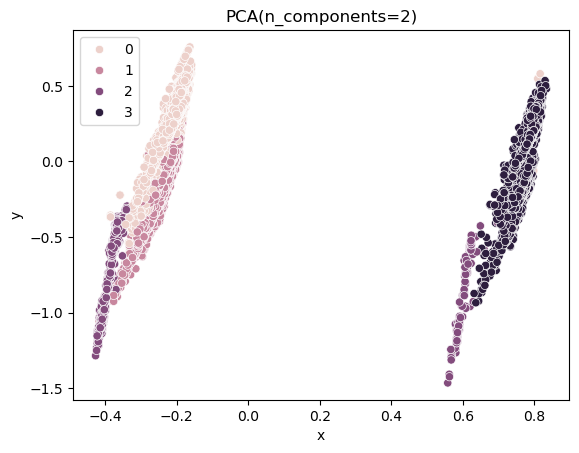

In [53]:
aggc = AgglomerativeClustering(n_clusters=4)
aggc_labels = aggc.fit_predict(df_copy)

cluster_plot(df_copy, aggc_labels)